In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import sklearn.datasets
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter, uniform_filter

C:\Users\Leo\AppData\Local\Temp\ipykernel_17144\2581149832.py:10: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, uniform_filter
C:\Users\Leo\AppData\Local\Temp\ipykernel_17144\2581149832.py:10: DeprecationWarning: Please use `uniform_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, uniform_filter


In [22]:
def DataFrameGen(nombre_dataframe,separacion = ';',IndexColumn=0):
    
    df = pd.read_csv(nombre_dataframe, sep=';', index_col=IndexColumn)
    
    df['Y'] = df.index
    
    return df

# Función para genera una reducción de dimensión a partir del algoritmo ingresado
def GDFReduccionDimension(nombre_dataframe,ColName='Y',separacion = ';',IC=0, algoritmo='UMAP'):
    
    df = pd.read_csv(nombre_dataframe, sep=';', index_col=IC)
    
    # Selección del algoritmo de reducción de dimensionalidad
    if algoritmo == 'UMAP':
        reducer = umap.UMAP(min_dist=0.9)
    elif algoritmo == 'PCA':
        reducer = PCA(n_components=2)
    elif algoritmo == 'MDS':
        reducer = MDS(n_components=2)
    else:
        raise ValueError("Algoritmo no soportado. Use 'UMAP', 'PCA' o 'MDS'.")

    # Aplicación del algoritmo seleccionado
    Share = reducer.fit_transform(df)

    dftS = pd.DataFrame(Share, index = df.index, columns=['D1', 'D2'])
    dftS[ColName] = dftS.index
    
    return dftS

def DFColCompleto(dfts,dfUmap):
    dftsP = dfts.copy()
    dfUmapP = dfUmap.copy()
    
    merged_df = pd.merge(dftsP, dfUmapP, on='Y', how='inner')
    merged_df.index = merged_df['Y']
    # Resetear el índice del DataFrame
    merged_df.reset_index(drop=True, inplace=True)
    return merged_df

In [23]:
dft = DataFrameGen('Exp1_Smooth_ECMA_W5.txt',separacion = ';',IndexColumn=0)
df_DR = GDFReduccionDimension('Exp1_Smooth_ECMA_W5.txt',ColName='Y',separacion = ';',IC=0, algoritmo = 'PCA')
DF_Com = DFColCompleto(dft,df_DR)
DF_Com

,Doc/Res,AI,%IC,RG,TDI,BCg,Y,D1,D2
0,0.522455,2.990480,20.084702,4.534447,4.769799,5.554823,1987,-36.018726,2.125847
1,0.447149,2.642541,22.301968,5.678544,5.927514,7.228595,1988,-33.481400,0.445368
2,0.462718,2.450735,20.563475,5.235003,6.091150,8.250801,1989,-33.508189,1.181172
3,0.501816,2.737408,11.254006,5.813445,6.638889,8.913547,1990,-34.757618,8.353083
4,0.622587,2.769617,5.572624,5.067451,7.430978,9.649097,1991,-36.029119,11.968212
5,0.565688,2.834346,8.400897,4.639708,6.831870,9.077064,1992,-36.113324,9.805638
6,0.809923,3.098824,22.267204,6.199148,7.595016,12.806205,1993,-29.233270,-1.119358
7,0.919955,3.236064,26.996039,7.453154,6.809863,16.261246,1994,-25.038237,-5.041478
8,1.117170,3.231253,24.343136,9.235003,7.908793,19.769032,1995,-21.958979,-3.219931
9,1.200555,3.321269,26.553008,12.915696,9.519420,19.607057,1996,-18.793423,-2.925161


In [24]:
def encontrar_mejor_distribucion(numero):
    # Encontrar todos los divisores del número
    divisores = [i for i in range(1, numero+1) if numero % i == 0]

    # Calcular el índice del primer valor del medio
    indice_medio = len(divisores) // 2
    
    # Obtener los dos valores del medio
    valor1 = divisores[indice_medio]
    valor2 = divisores[indice_medio - 1] if len(divisores) % 2 == 0 else valor1
    
    return valor1, valor2

def GenGraficoGeneral(DF,largo=2.5,alto=5,resolucion = 10000,gridsize=30,etiquetas=True):
    # Nombre de las columnas
    names_col = DF.columns.tolist()[:-2]

    # Número de columnas
    numero = len(names_col)

    #Función para determinar la distribución de los subgráficos
    val1,val2 = encontrar_mejor_distribucion(numero)

    # Definir los límites de la región de los datos
    xmin, xmax = DF['D1'].min(), DF['D1'].max()
    ymin, ymax = DF['D2'].min(), DF['D2'].max()

    # Generar coordenadas para los hexágonos sin información
    x_empty, y_empty = np.meshgrid(np.linspace(xmin, xmax, gridsize), np.linspace(ymin, ymax, gridsize))
    x_empty = x_empty.flatten()
    y_empty = y_empty.flatten()

    # Extender el DataFrame original con las coordenadas de los hexágonos sin información
    empty_df = pd.DataFrame({'D1': x_empty, 'D2': y_empty})

    # Concatenar el DataFrame original con el DataFrame de hexágonos sin información
    extended_df = pd.concat([DF, empty_df])

    extended_df = extended_df.fillna(0)

    fig, axes = plt.subplots(nrows=val1, ncols=val2)
    contador=0
    for ax in axes.flat:

        im = ax.hexbin(extended_df['D1'],extended_df['D2'], C=extended_df[names_col[contador]], gridsize = 10,
                       cmap = "magma", alpha = 0.9,reduce_C_function=np.mean, extent=(xmin, xmax, ymin, ymax))

        # Calcular un filtro uniforme alrededor de cada hexágono
        smoothed_data = uniform_filter(im.get_array(), size=2)

        # Identificar hexágonos adyacentes sin información
        masked_data = np.ma.masked_where(im.get_array() > 0, im.get_array())

        # Colorear los hexágonos adyacentes sin información con el gradiente suavizado
        im.set_array(smoothed_data + masked_data)

        # Colorear los hexágonos con el gradiente suavizado
        im.set_array(smoothed_data)

        spline_x = CubicSpline(range(len(DF['D1'])), DF['D1'])
        spline_y = CubicSpline(range(len(DF['D2'])), DF['D2'])

        # Nuevos puntos para la curva suavizada
        t_smooth = np.linspace(0, len(DF['D1'])-1, resolucion)

        # Evaluar la spline cúbica en los nuevos puntos
        x_smooth = spline_x(t_smooth)
        y_smooth = spline_y(t_smooth)

        # Agregar curva
        ax.plot(x_smooth, y_smooth , label=Nombre)
        ax.scatter(DF['D1'], DF['D2'])
        
        if etiquetas == True:
            # Agregar etiquetas a cada punto
            for i, label in enumerate(DF['Y']):
                ax.text(DF['D1'][i], DF['D2'][i], label)

        plt.colorbar(im)
        # Agregar el nombre de cada sub
        ax.set_title(names_col[contador])

        contador+=1

    # Legend
    fig.subplots_adjust( bottom=1,left=0, right=Largo, top=Alto)
    
    return plt.show()

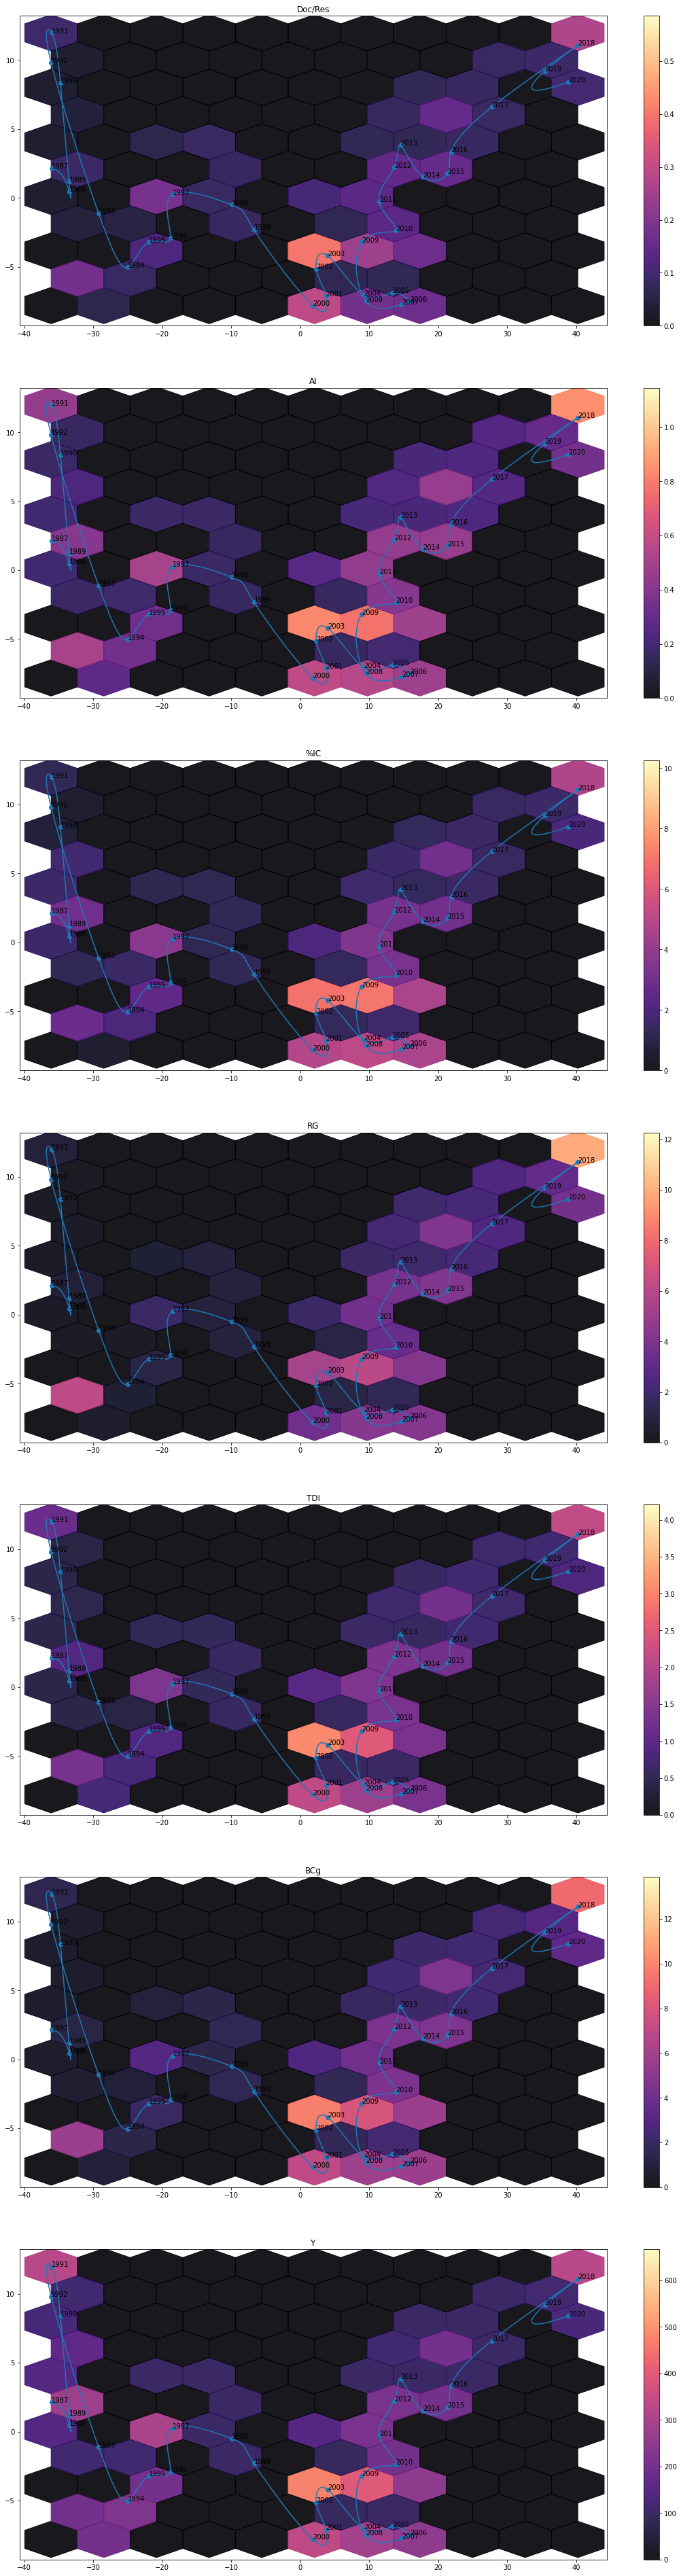

In [25]:
# Resilución para con la que se genera el ajuste cubic spline
Res = 10000

# Definir la resolución del gráfico de hexágonos
grid = 30

#Dimensiones del gráfico
Largo = 2.5
Alto = 14

GenGraficoGeneral(DF_Com,largo=Largo,alto=Alto,resolucion = Res,gridsize=grid,etiquetas=True)